<div class = "alert alert-block alert-info">
    <b> Przetwarzanie multimediów. Detekcja barw </b>
   
FTiMS, semestr letni 2022/2023

Laboratorium 7
</div>

### Zapoznaj się z ...

Zapoznaj się z poniższymi dokumentami

1. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces
1. https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/
1. Dla zainteresowanych (warto): https://learnopencv.com/automatic-red-eye-remover-using-opencv-cpp-python/

oraz przykładami w niniejszym notebooku.

### Uwaga

Zadanie do rozwiązania podane jest poniżej.

# Detekcja ludzkiej skóry (*skin detection*)

Nietrywialnym przykładem przekształceń w przestrzeni barw jest detekcja ludzkiej skóry. 

Importujemy niezbędne pakiety:

In [1]:
import cv2
import numpy as np

In [25]:
#flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#flags

Ustawiamy zakres wartości dla barwy skóry. 

In [26]:
lower = np.array([0,130,75], np.uint8)
upper = np.array([245,170,127], np.uint8)

Detekcja skóry w strumieniu wideo:

In [27]:
video = cv2.VideoCapture('intro_cut.mkv')
while True:
    ret, frame = video.read()
    if not ret:
        break
  
    frame = cv2.blur(frame,(10,10))
    YCRimage = cv2.cvtColor(frame,cv2.COLOR_BGR2YCR_CB)
    
    mask_skin = cv2.inRange(YCRimage, lower, upper)
    frame_skin = cv2.bitwise_and(frame, frame, mask = mask_skin)
    
    cv2.imshow('detected skin', frame_skin)
    if cv2.waitKey(1) == 27:
        break
        
video.release()
cv2.destroyAllWindows()

# Śledzenie obiektów barwnych

<div class = "alert alert-block alert-warning">
<b> Zadanie (1 punkt): </b> Stwórz aplikację "wykrywającą" obiekty barwne (ale nie ludzką skórę :)). Posłuż się przykładowym kodem umieszczonym pod adresem
    
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces.

Wybierz własny przedmiot. Rozwiązanie logicznie podziel na dwie części. 
1. W pierwszej określ przedziały wartości HSV definiujące swój obiekt. Podpowiedź: wyświetl obraz z kamery video podzielony na składowe H, S oraz V, a następnie ustal (zapisz) jakie są zakresy składowych H, S, V dla Twojego obiektu.
2. W drugiej, na podstawie kodu z linku wyżej, wykonaj  śledzenie obiektu w czasie rzeczywistym (z kamery).
    
Poniżej umieść swoje rozwiązanie (kod) **oraz screenshoty swojej aplikacji**. Umieść też informacje jaki obiekt podlegał śledzeniu.
</div>

*Swoje rozwiązanie umieść poniżej*

In [1]:
import cv2
import numpy as np

In [2]:
#purple = np.uint8([[[9*16+3,3*16+3,7*16+15]]]) # zebrane z color pickera (RGB)
purple = np.uint8([[[7*16+15,3*16+3,9*16+3]]]) # zebrane z color pickera
hsv_purple = cv2.cvtColor(purple, cv2.COLOR_BGR2HSV)
lower = np.uint8([hsv_purple[0][0][0]-10, 100, 100])
upper = np.uint8([hsv_purple[0][0][0]+10, 255, 255])
print(lower)
print(upper)

[146 100 100]
[166 255 255]


In [3]:
video = cv2.VideoCapture('intro_cut.mkv')
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
        
    # add work image
    work = frame.copy()
    
    # blur the image
    work = cv2.blur(work, (10,10))
    
    # convert the image to HSV and find the mask
    work_hsv = cv2.cvtColor(work, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(work_hsv, lower, upper)
    result = cv2.bitwise_and(work, work, mask=mask)
    
    # Concatenate both frames (original and altered) and scale them down to fit the screen
    concat = np.concatenate((frame,result), axis=1)
    scale_percent = 75 # percent of original size
    width = int(concat.shape[1] * scale_percent / 100)
    height = int(concat.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(concat, dim)
    
    # Display the image
    cv2.imshow('video - original & altered', resized)
    if cv2.waitKey(1) == 27:
        break
        
video.release()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'screenshot z video')

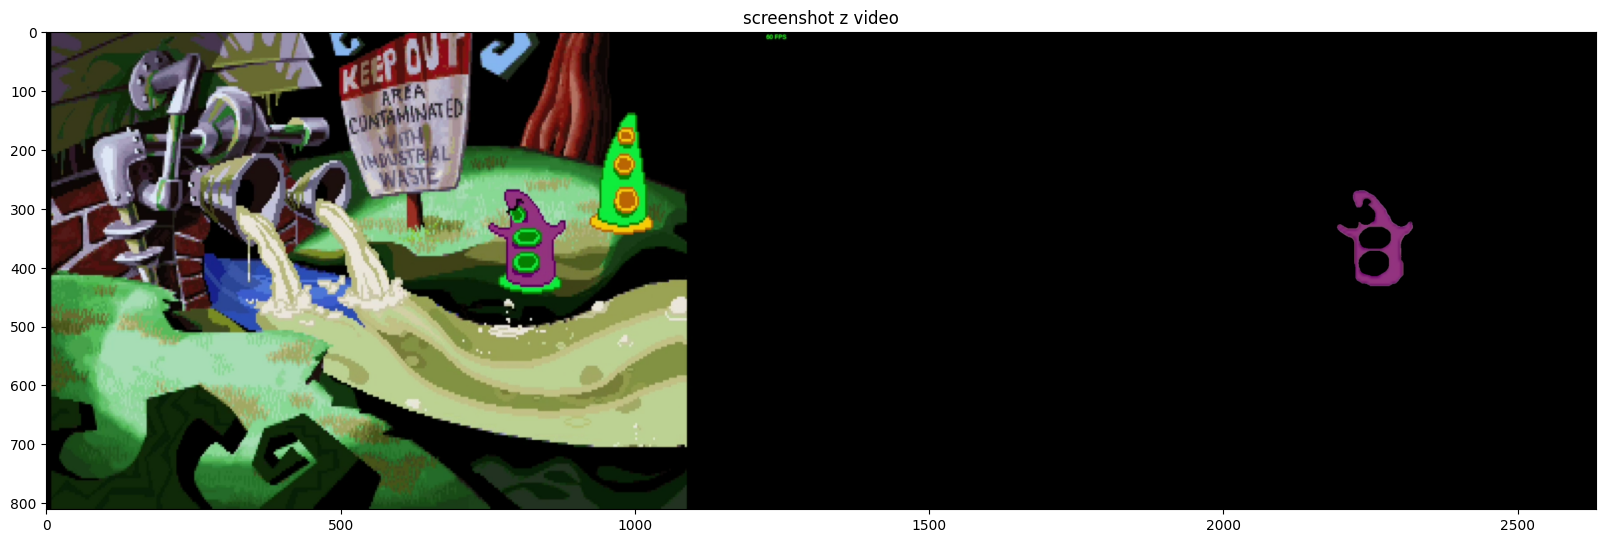

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('one_frame.png')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.title('screenshot z video')